In [2]:
%matplotlib inline
import numpy as np # linear algenra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visulization
import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Data\insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


age : age of the insured
sex : sex of the insured
bmi : body mass index of the insured
children: no of children of the insured
smoker : does insured person smokes? yes or no
region: region of residence, direction
charges: insuarnce charges

In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age : age of the insured <br/> sex : sex of the insured <br/> bmi : body mass index of the insured <br/> children: no of children of the insured <br/> smoker : does insured person smokes? yes or no <br/> region: region of residence, direction <br/> charges: insuarnce charges
# All the values are not null 
# Sex, Smoker and Region are categorical data <br/>
Sex : 'female', 'male' <br/>
Smoker : 'yes', 'no' <br/>
Region: 'southwest', 'southeast', 'northwest', 'northeast' <br/>

In [7]:
df.isnull().sum() # we can use dropna() to drop rows or dropna(axis='columns') to drop  columns with NULL values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df['sex'].unique()
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
# Check for duplicate values
df.duplicated().sum() # There is one duplicate row 

1

In [10]:
df[df.duplicated()]# find duplicate data

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [11]:
# Remove Duplicate data
df=df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

# Removed the duplicate data

In [13]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='children', ylabel='Count'>

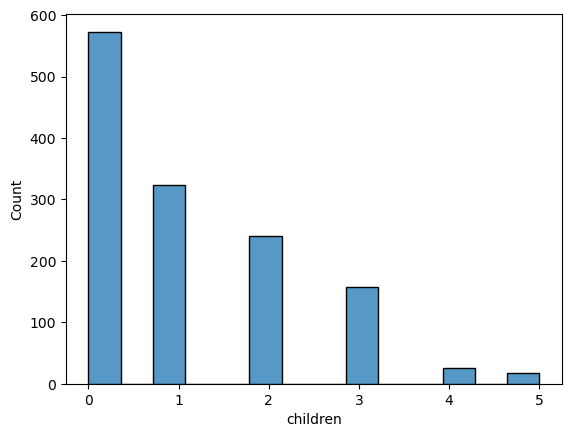

In [15]:
# Age looks well distributed between 18 to 64 , mean being 39
# Bmi looks well distributed betwwen 15 to 53 , mean being 30
# childern seems to have outliers as 75 percentile is 2, however max is 5
# charges seems to have outliers as 75 percentile is 16k around, max is 63k
sns.histplot(data=df['children'])


<Axes: >

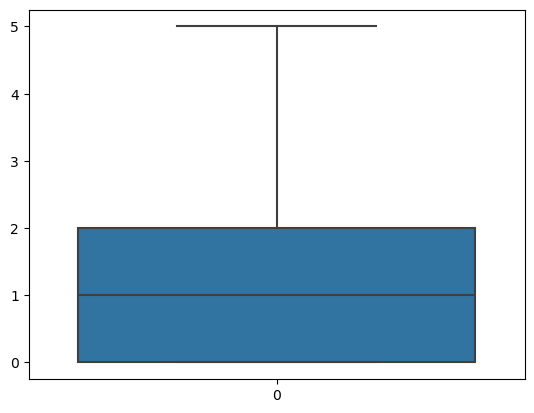

In [16]:
sns.boxplot(df['children'])

# Should I call the 4 and 5 children outlier ?? BoxPlot doesn't say so

<Axes: xlabel='charges', ylabel='Count'>

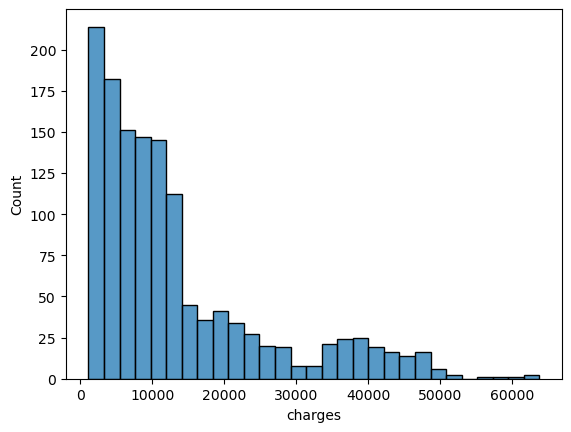

In [17]:
sns.histplot(data=df['charges'])

<Axes: >

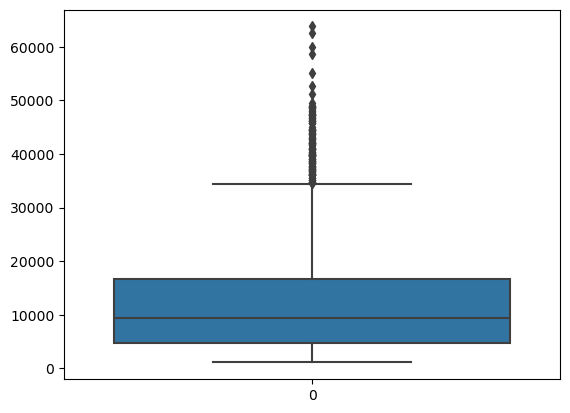

In [18]:
sns.boxplot(df['charges'])

# Charges seemed to have outliers, boxplot also states the same

## Univariate Analysis of Categorical Features

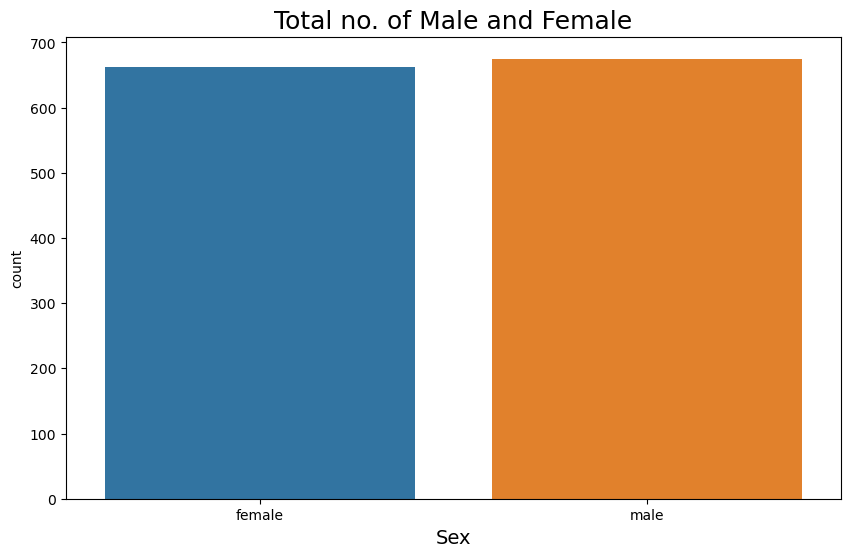

In [19]:
# Univariate Analysis of Categorical Features
plt.figure(figsize=(10,6))# figure size in inches
sns.countplot(x ='sex', data =df)
plt.title('Total no. of Male and Female', size=18)
plt.xlabel('Sex', size=14)
plt.show()

# Male and female have almost same numbers

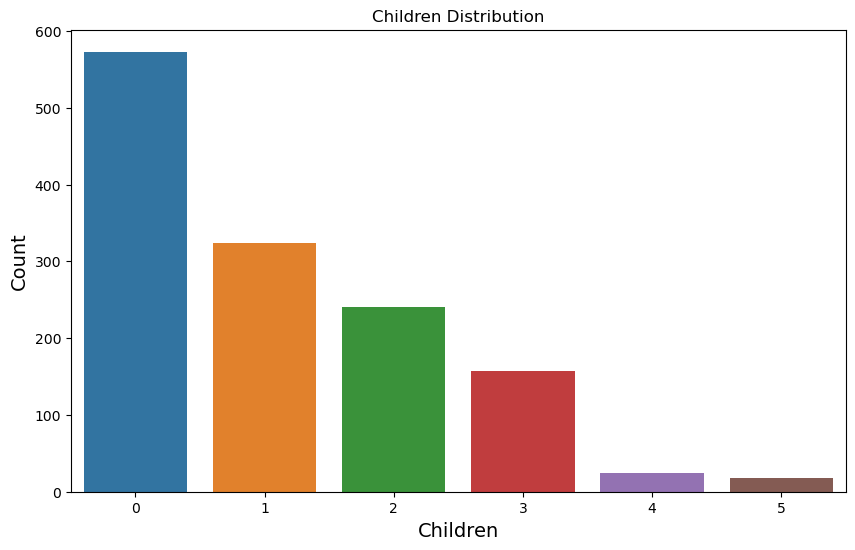

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='children', data =df)
plt.title('Children Distribution')
plt.xlabel('Children', size=14)
plt.ylabel('Count', size=14)
plt.show()

# Majority of People don't have children

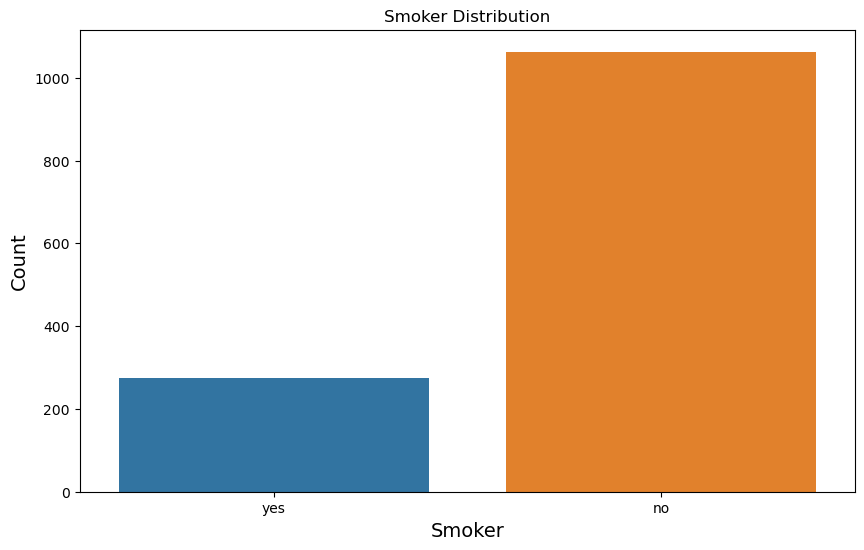

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='smoker', data =df)
plt.title('Smoker Distribution')
plt.xlabel('Smoker', size=14)
plt.ylabel('Count', size=14)
plt.show()

In [22]:
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

# Non smoker's are 4 times smoker people

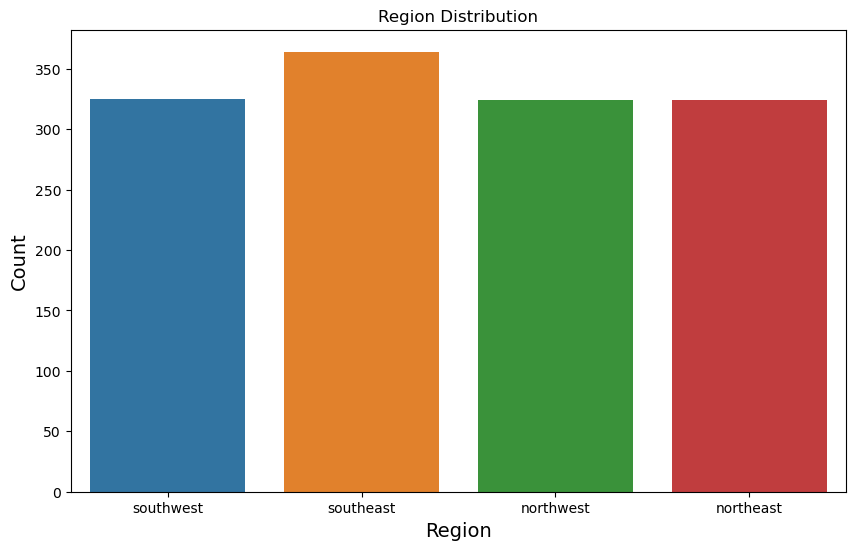

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='region', data =df)
plt.title('Region Distribution')
plt.xlabel('Region', size=14)
plt.ylabel('Count', size=14)
plt.show()

# Regions are almost equally distributed

## Bivariate Analysis
### BoxPlot - categorical vs numerical
### Scatterplot - numerical vs numerical
### Contingency table - categorical vs categorical

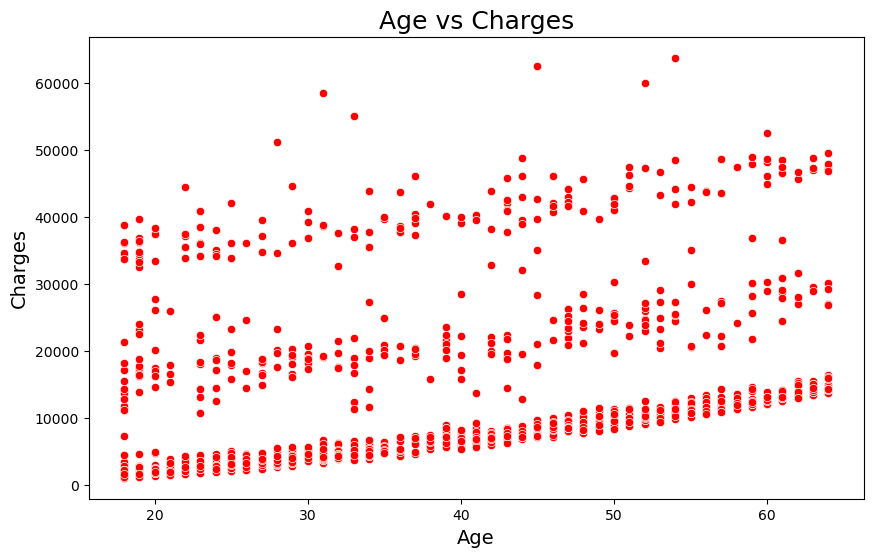

In [24]:
# Age vs charges
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='charges', color='r', data =df)
plt.title('Age vs Charges', size=18)
plt.xlabel('Age', size=14)
plt.ylabel('Charges', size=14)
plt.show()

# As age increase, charges also increases but slightly (weak positive relation)

In [25]:
df['age'].corr(df['charges'])

0.2983082125097863

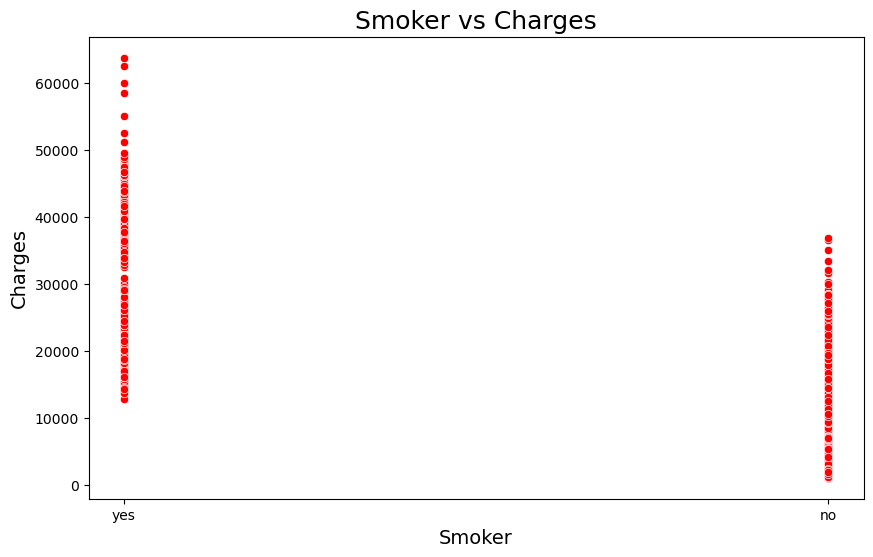

In [28]:
#Smoker vs charges
plt.figure(figsize=(10,6))
sns.scatterplot(x='smoker', y='charges', color='r', data =df)
plt.title('Smoker vs Charges', size=18)
plt.xlabel('Smoker', size=14)
plt.ylabel('Charges', size=14)
plt.show()


# Smokers have more insuarnce charges

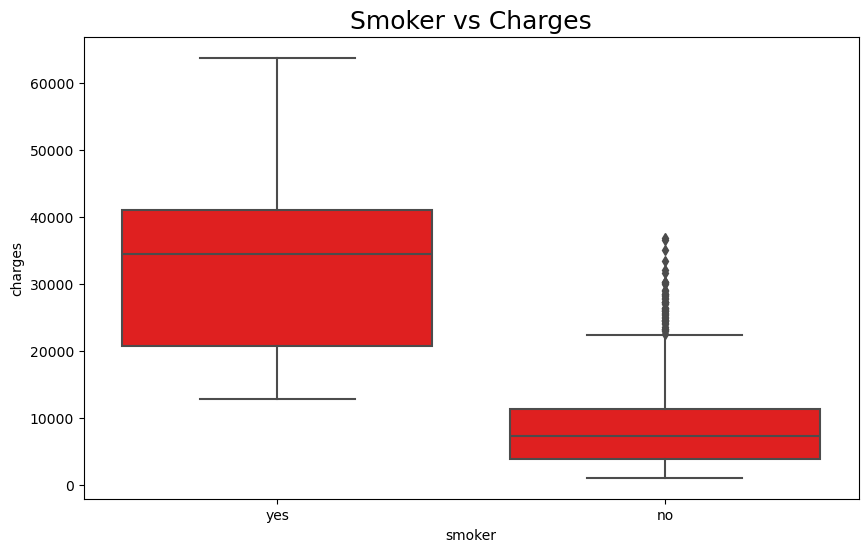

In [29]:
#Smoker vs charges , categorical vs numerical box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker', y='charges', color='r', data =df)
plt.title('Smoker vs Charges', size=18)
plt.show()

In [30]:
# Smokers paying more insurance charges. 
# There are outliers in smokers vs charges